In [1]:
import pression as pr
import numpy as np
import matplotlib.pyplot as plt

Importation des librabries necessaires au projet
La librairie pression contient une classe **Materiau** et une fonction **deplacement** pour definir les caractéristiques du matériau que sont le module de Young, le coefficient de Posson et le rayon de courbure (la géométrie du matériau). La fonction deplacement calcule le déplacement radial en fonction de la position radiale et de la charge appliquée.

In [2]:
# Reload module (or restart kernel) so changes in pression.py are picked up
import importlib
import pression as pr
importlib.reload(pr)

# Create materials (use `radius` keyword - `raduis` still accepted for compatibility)
E1 = pr.Materiau(nom="Acier", module_young=5e5, coefficient_poisson=0.45, radius=0.0)
E2 = pr.Materiau(nom="Aluminium", module_young=1e7, coefficient_poisson=0.45)
E3 = pr.Materiau(nom="Cuivre", module_young=2.1e11, coefficient_poisson=0.3)



On definit les materiaux suivant avec les caractéristiques definis telsque haut module de young, coefficient de poisson et rayon de courbure.

In [3]:
pr.P=100 # Charge in N
r=np.linspace(0.01,0.2,100) # Radial positions in m
w1=pr.deplacement(E1,r)
w2=pr.deplacement(E2,r)
w3=pr.deplacement(E3,r)

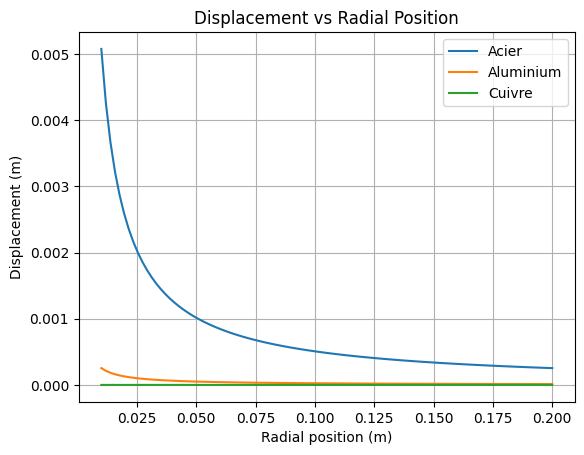

In [4]:
plt.plot(r,w1, label=E1.nom)
plt.plot(r,w2, label=E2.nom)    
plt.plot(r,w3, label=E3.nom)
plt.legend()
plt.xlabel("Radial position (m)")
plt.ylabel("Displacement (m)")
plt.title("Displacement vs Radial Position")
plt.grid()
plt.show()

On constate que plus le module est élévé,moins le déplacement est important.
Cela s'explique par la durété du matériau qui est lié au module de young.
On peut le voir par la formule du déplacemnt radial comme suit:
$$w=\frac{(1-\nu^2)P}{2\pi E r}$$

## Le but est d'évaluer la pression de contact entre differents matériaux et commenter les résultats obtenus.


In [5]:


# Create materials (use `radius` keyword - `raduis` still accepted for compatibility)
E1 = pr.Materiau(nom="Acier", module_young=2.1e11, coefficient_poisson=0.3, radius=0.0)
E2 = pr.Materiau(nom="Aluminium", module_young=1e11, coefficient_poisson=0.3, radius=0.0)
E3 = pr.Materiau(nom="Cuivre", module_young=1e7, coefficient_poisson=0.45, radius=0.0)

# Sphères
S1=pr.Materiau(nom="Sphère1", module_young=2.1e11, coefficient_poisson=0.3, radius=0.05)
S2=pr.Materiau(nom="Sphère2", module_young=2.1e11, coefficient_poisson=0.3, radius=0.1)

# Efforts Appliqués
P1=50
P2=100





In [6]:
materiau=np.array([E1,E2,E3])
sphere=np.array([S1,S2])
P=np.array([P1,P2])

In [7]:
Pression_results=np.zeros((len(materiau),len(sphere),len(P),100)) # 4D array to store results
r_results=np.zeros((len(materiau),len(sphere),len(P),100)) # 4D array to store r values
for i in range(len(materiau)):
    for j in range(len(sphere)):
        for k in range(len(P)):
           a=materiau[i].rayon_contact(sphere[j],P[k])
           r=np.linspace(0,a,100)
           Pression_results[i,j,k,:] = materiau[i].pression_contact(sphere[j],r)
           r_results[i,j,k,:] = r
            

## Visualisation : distribution de pression par combinaison

Ce bloc affiche une figure séparée pour **chaque combinaison** (matériau, sphère, charge P). Il parcourt les tableaux pré-calculés `r_results` (positions radiales) et `Pression_results` (valeurs de pression) et trace la distribution de pression en fonction de la position radiale pour la paire matériau–sphère considérée et la charge appliquée.

Les axes, la légende et le titre incluent le nom du matériau, le nom de la sphère et la valeur de la charge afin de faciliter la comparaison. Si vous préférez sauvegarder automatiquement chaque figure, on peut ajouter un `plt.savefig(...)` à l'intérieur de la boucle.

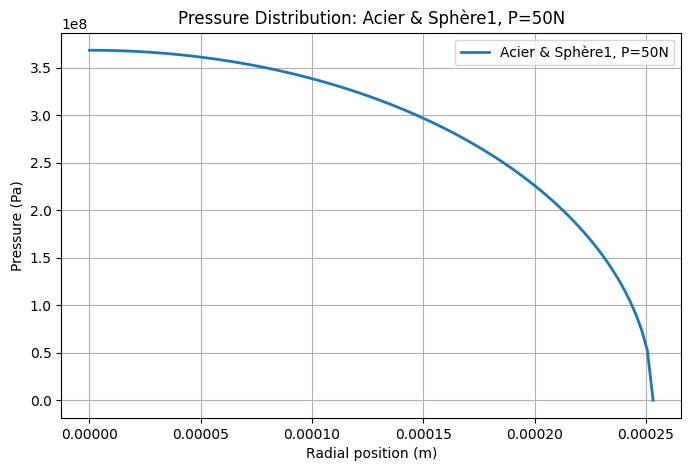

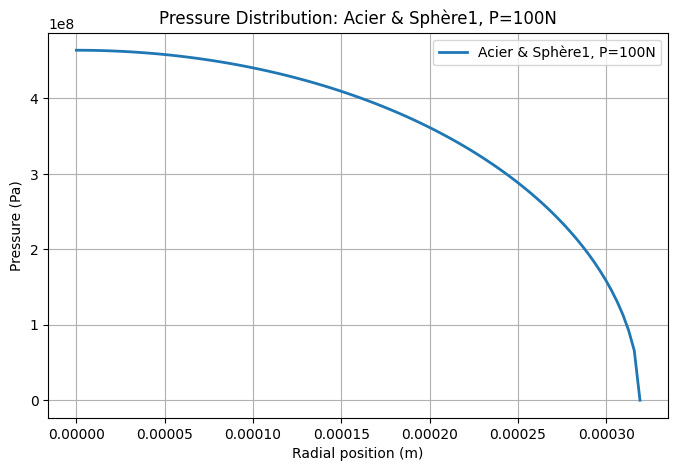

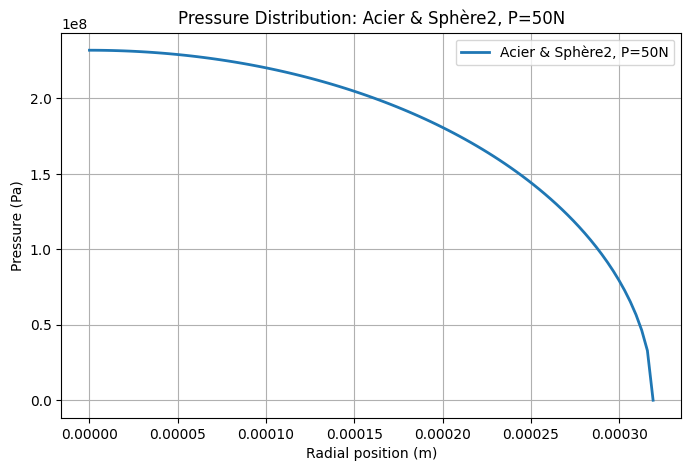

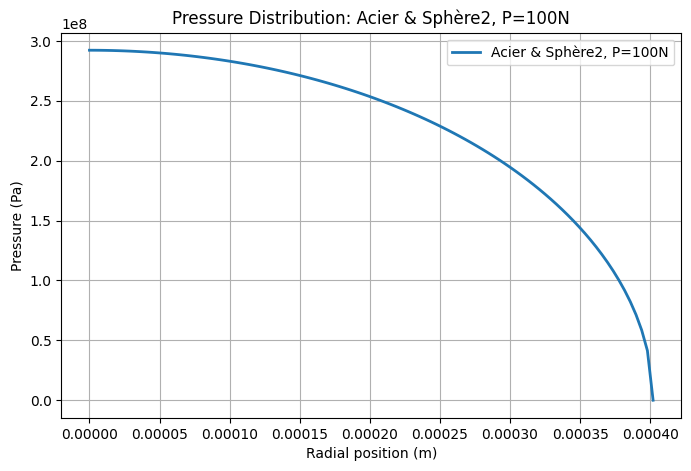

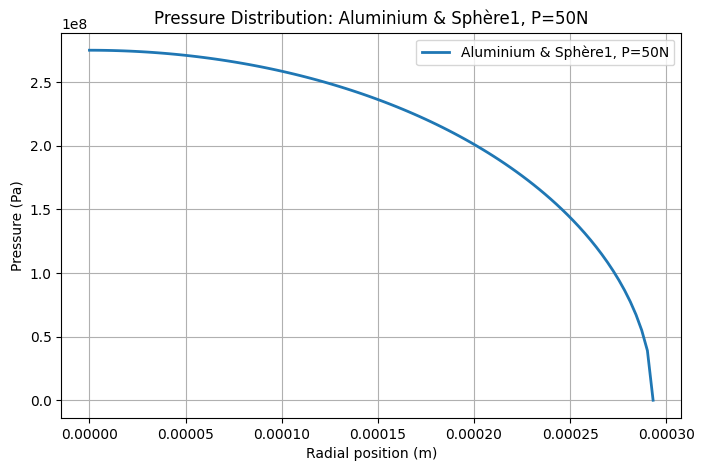

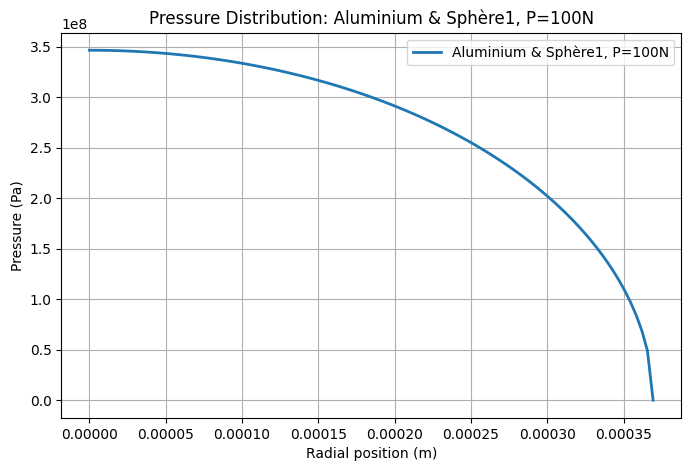

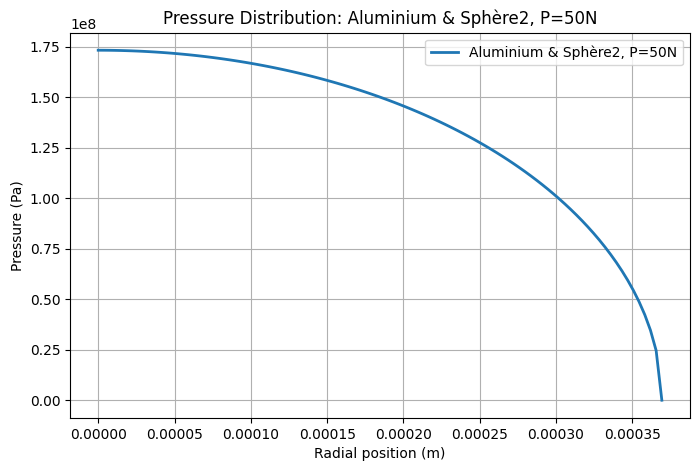

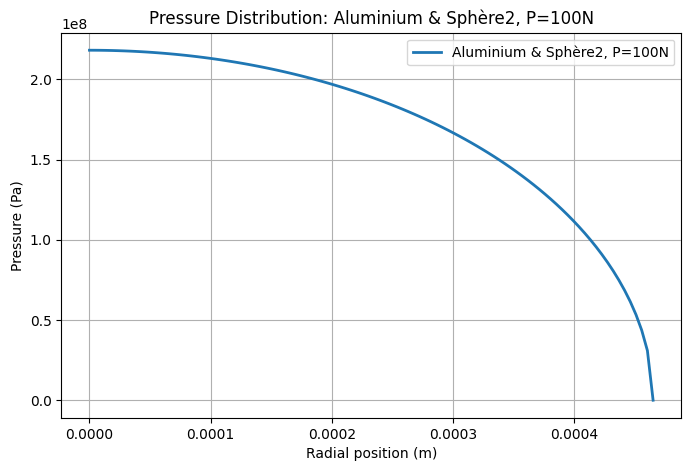

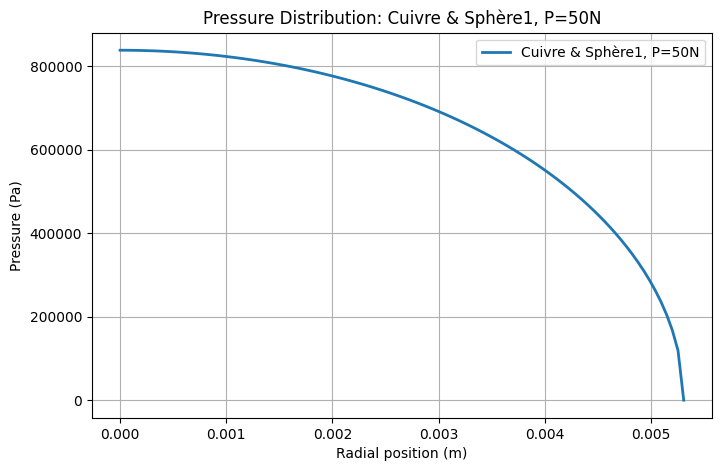

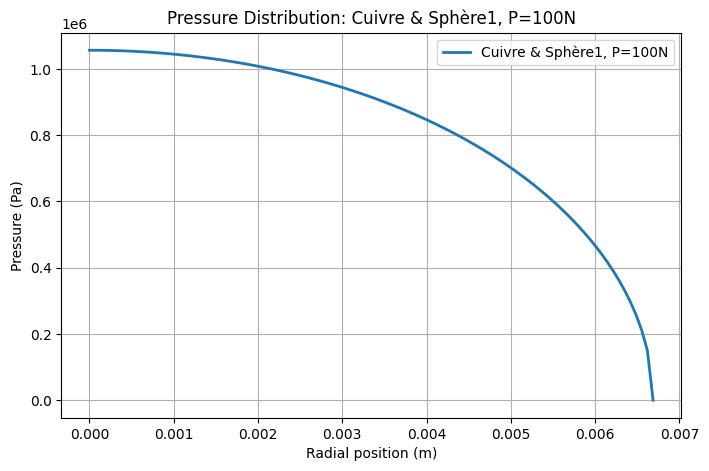

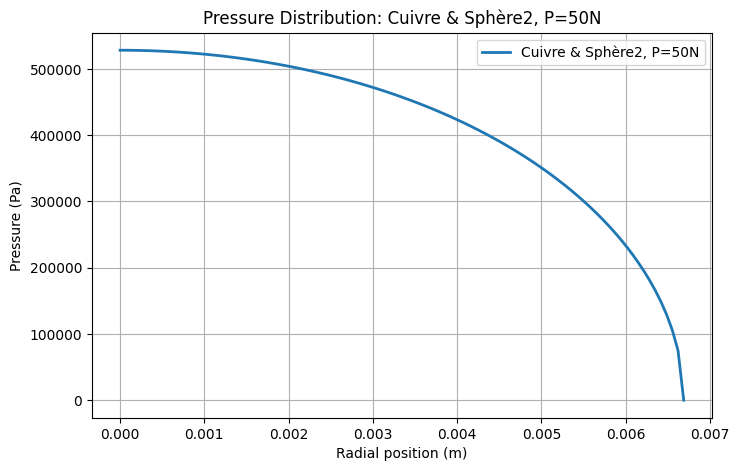

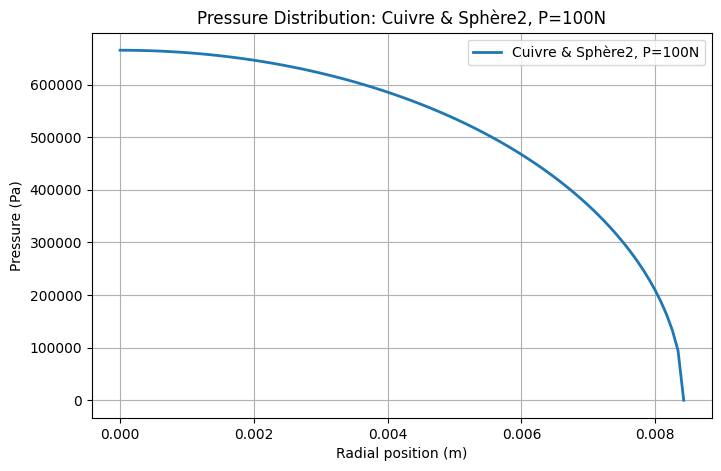

In [8]:
# Trace une figure séparée pour chaque combinaison matériau–sphère–P
for i in range(len(materiau)):
    for j in range(len(sphere)):
        for k in range(len(P)):
            plt.figure(figsize=(8, 5))
            plt.plot(r_results[i, j, k], Pression_results[i, j, k], lw=2)
            plt.legend([f"{materiau[i].nom} & {sphere[j].nom}, P={P[k]}N"])
            plt.xlabel("Radial position (m)")
            plt.ylabel("Pressure (Pa)")
            plt.title(f"Pressure Distribution: {materiau[i].nom} & {sphere[j].nom}, P={P[k]}N")
            plt.grid()
            plt.show()


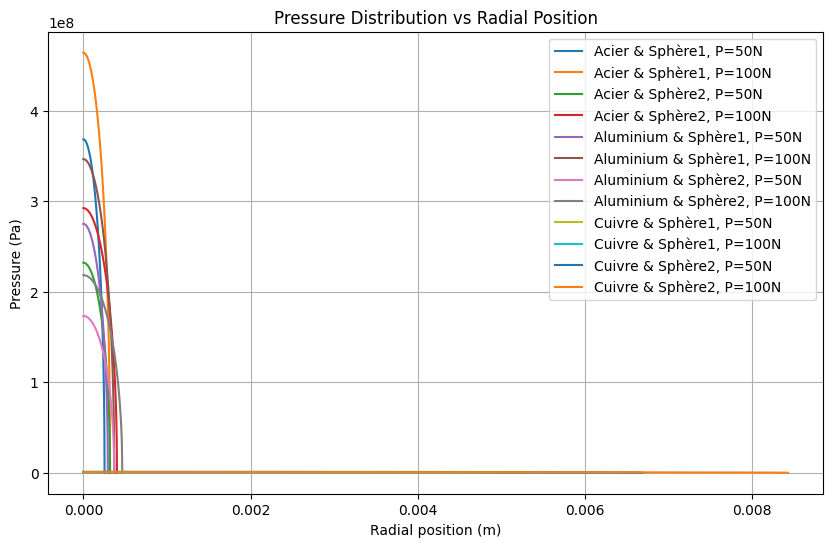

In [9]:
plt.figure(figsize=(10, 6))
for i in range(len(materiau)):
    for j in range(len(sphere)):
        for k in range(len(P)):
            plt.plot(r_results[i,j,k], Pression_results[i,j,k], label=f"{materiau[i].nom} & {sphere[j].nom}, P={P[k]}N")
plt.legend()
plt.xlabel("Radial position (m)")
plt.ylabel("Pressure (Pa)")
plt.title("Pressure Distribution vs Radial Position")
plt.grid()
plt.show()